In [35]:
from glob import glob
import pandas as pd 
import numpy as np 
from pickle import load, dump
import datetime as dt 
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/jerald/Documents/Dir/Python/Stocks')
# from bin.main import Manager 
# m = Manager('../../../')
# m.Earningsdb.get_earning_dates()

In [31]:
from bin.earnings.util import * 
p1 = '../../../data/earnings/7/earnigns729.pkl'
p2 = '../../../data/earnings/7/earnings920.pkl'
df0 = load(open(p1, 'rb'))['aapl']['balance_sheet']
df1 = load(open(p2, 'rb'))['aapl']['balance_sheet']
jdf = concatenate_statements(df0, df1)
print(jdf.shape)
files = glob('../../../data/earnings/7/*.pkl')
files.sort()
files + ['../../../data/earnings/earnings.pkl']

(7, 70)


['../../../data/earnings/7/earnigns729.pkl',
 '../../../data/earnings/7/earnings730.pkl',
 '../../../data/earnings/7/earnings82.pkl',
 '../../../data/earnings/7/earnings830.pkl',
 '../../../data/earnings/7/earnings912.pkl',
 '../../../data/earnings/7/earnings920.pkl',
 '../../../data/earnings/earnings.pkl']

In [32]:
# Need to Concatenate All earnings data into one dictionary. 
# This is the Full Earnings Data, including all the data from the previous periods.
# The earnings information for each stock has the following structure:
#       stock: {
#           balance_sheet: Pandas DataFrame,
#           income_statement: Pandas DataFrame,
#           cashflow: Pandas DataFrame,
#           earnings: Pandas DataFrame
#       } 
jdf

,Treasury Shares Number,Ordinary Shares Number,Share Issued,Net Debt,Total Debt,Tangible Book Value,Invested Capital,Working Capital,Net Tangible Assets,Capital Lease Obligations,...,Finished Goods,Raw Materials,Receivables,Other Receivables,Accounts Receivable,Cash Cash Equivalents And Short Term Investments,Other Short Term Investments,Cash And Cash Equivalents,Cash Equivalents,Cash Financial
2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4307000000.0,2513000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,NaN,15723406000.0,15723406000.0,84928000000.0,109615000000.0,62158000000.0,171773000000.0,-7162000000.0,62158000000.0,NaN,...,4103000000.0,3379000000.0,35899000000.0,17963000000.0,17936000000.0,55872000000.0,31185000000.0,24687000000.0,4637000000.0,20050000000.0
2023-06-30,NaN,15647868000.0,15647868000.0,80872000000.0,109280000000.0,60274000000.0,169554000000.0,-2304000000.0,60274000000.0,NaN,...,3563000000.0,3788000000.0,39186000000.0,19637000000.0,19549000000.0,62482000000.0,34074000000.0,28408000000.0,3071000000.0,25337000000.0
2023-09-30,0.0,15550061000.0,15550061000.0,81123000000.0,123930000000.0,62146000000.0,173234000000.0,-1742000000.0,62146000000.0,12842000000.0,...,NaN,NaN,60985000000.0,31477000000.0,29508000000.0,61555000000.0,31590000000.0,29965000000.0,1606000000.0,28359000000.0
2023-12-31,0.0,15460223000.0,15460223000.0,67280000000.0,108040000000.0,74100000000.0,182140000000.0,9719000000.0,74100000000.0,NaN,...,NaN,NaN,50102000000.0,26908000000.0,23194000000.0,73100000000.0,32340000000.0,40760000000.0,11218000000.0,29542000000.0
2024-03-31,NaN,15337686000.0,15337686000.0,71895000000.0,104590000000.0,74194000000.0,178784000000.0,4594000000.0,74194000000.0,NaN,...,NaN,NaN,41150000000.0,19313000000.0,21837000000.0,67150000000.0,34455000000.0,32695000000.0,4468000000.0,28227000000.0
2024-06-30,NaN,15222259000.0,15222259000.0,75739000000.0,101304000000.0,66708000000.0,168012000000.0,-6189000000.0,66708000000.0,NaN,...,NaN,NaN,43172000000.0,20377000000.0,22795000000.0,61801000000.0,36236000000.0,25565000000.0,2699000000.0,22866000000.0


In [54]:
earnings_dict = {}
lod = [load(open(file, 'rb')) for file in files]
for stock in lod[0].keys():
    earnings_dict[stock] = {}
    try: 
        for key in lod[0][stock].keys():
            if key != 'earnings':
                df = pd.concat([lod[i][stock][key] for i in range(len(lod)) if stock in lod[i].keys()], axis = 1).T
                df = df[~df.index.duplicated()].sort_index().T
            else:
                df = pd.concat([lod[i][stock][key] for i in range(len(lod)) if stock in lod[i].keys()])
            
            earnings_dict[stock][key] = df.sort_index()
    except Exception as e:
        print("stock: ", stock)
        pass

stock:  djt


In [55]:
earnings_dict['tsla']['balance_sheet'].T

,Accounts Payable,Accounts Receivable,Accumulated Depreciation,Additional Paid In Capital,Capital Lease Obligations,Capital Stock,Cash And Cash Equivalents,Cash Cash Equivalents And Short Term Investments,Cash Equivalents,Cash Financial,...,Total Capitalization,Total Debt,Total Equity Gross Minority Interest,Total Liabilities Net Minority Interest,Total Non Current Assets,Total Non Current Liabilities Net Minority Interest,Total Tax Payable,Treasury Shares Number,Work In Process,Working Capital
2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-30,15273000000.0,3447000000.0,-11672000000.0,33436000000.0,4292000000.0,3000000.0,15296000000.0,23075000000.0,273000000.0,15023000000.0,...,51634000000.0,5811000000.0,52182000000.0,38409000000.0,46721000000.0,10817000000.0,1244000000.0,NaN,2202000000.0,16283000000.0
2023-09-30,13937000000.0,2520000000.0,-12520000000.0,34201000000.0,4483000000.0,3000000.0,15932000000.0,26077000000.0,1153000000.0,14779000000.0,...,55618000000.0,8187000000.0,54495000000.0,39446000000.0,48916000000.0,12806000000.0,1095000000.0,0.0,2246000000.0,18386000000.0
2023-12-31,14431000000.0,3508000000.0,-15080000000.0,34892000000.0,4916000000.0,3000000.0,16398000000.0,29094000000.0,495000000.0,15903000000.0,...,65316000000.0,9573000000.0,63609000000.0,43009000000.0,57002000000.0,14261000000.0,1204000000.0,0.0,2016000000.0,20868000000.0
2024-03-31,14725000000.0,3887000000.0,-12852000000.0,35763000000.0,5037000000.0,3000000.0,11805000000.0,26863000000.0,418000000.0,11387000000.0,...,67117000000.0,9911000000.0,65180000000.0,44046000000.0,58691000000.0,14593000000.0,1186000000.0,0.0,2507000000.0,21082000000.0
2024-06-30,13056000000.0,3737000000.0,-13648000000.0,36443000000.0,5153000000.0,3000000.0,14635000000.0,30720000000.0,408000000.0,14227000000.0,...,71806000000.0,12515000000.0,67263000000.0,45569000000.0,59855000000.0,17840000000.0,1100000000.0,0.0,1977000000.0,25248000000.0


In [57]:
with open('../../../data/earnings/earnings.pkl', 'wb') as f:
    dump(earnings_dict, f)

Text(0, 0.5, 'EPS')

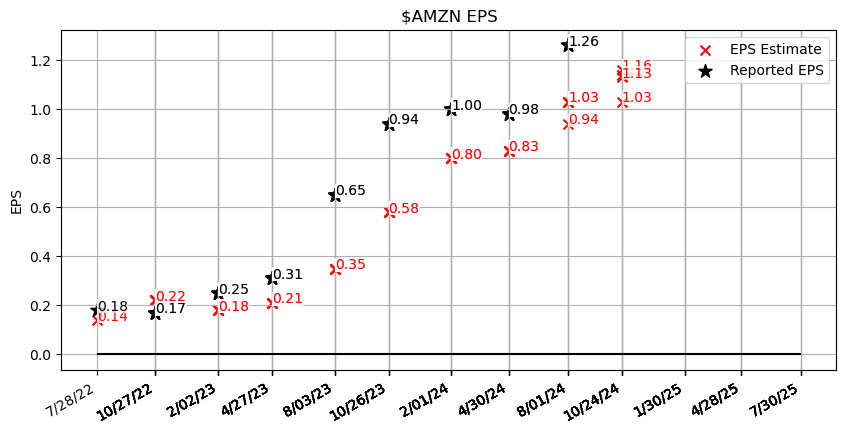

In [6]:
stock = 'amzn'
df = earnings_dict[stock]['earnings'].copy()
df['actual'] = df['Reported EPS'].index.strftime('%-m/%d/%y')

fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(df.index, df['EPS Estimate'], label='EPS Estimate', color = 'red', marker='x', s = 50)
ax.scatter(df.index, df['Reported EPS'], label='Reported EPS', color = 'black', marker='*', s = 100)
# Annotate the date of the earnings report.
for dte, reported, est in zip(df.index, df['Reported EPS'], df['EPS Estimate']):
    ax.annotate(f'{est:.2f}', (dte, est), color='red',bbox=dict(boxstyle='square', pad=0, lw=0, fc=(1, 1, 1, 0.7)))
    ax.annotate(f'{reported:.2f}', (dte, reported),bbox=dict(boxstyle='square', pad=0, lw=0, fc=(1, 1, 1, 0.7)))

# Only Label the x-axis with the actual dates of the earnings reports.
# set ticks 
ax.set_xticks(df.index)
# Format dates in the x-axis (labels)
ax.set_xticklabels(df['actual'], rotation=45)

ax.hlines(0, df.index[0], df.index[-1], color='black', linestyle='-', linewidth=1.5)
ax.grid()
ax.legend()
fig.autofmt_xdate()
ax.set_title(f'${stock.upper()} EPS')
ax.set_ylabel('EPS')

In [8]:
alpha = load(open('../../../alphaadv/data/amzn_earnings.pkl', 'rb')) ### Only AMZN 
d = alpha['amzn']['earnings']
d.fiscalDateEnding = pd.to_datetime(d.fiscalDateEnding)
d = d.set_index('fiscalDateEnding').sort_index()
d

{'Information': 'Thank you for using Alpha Vantage! Our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}

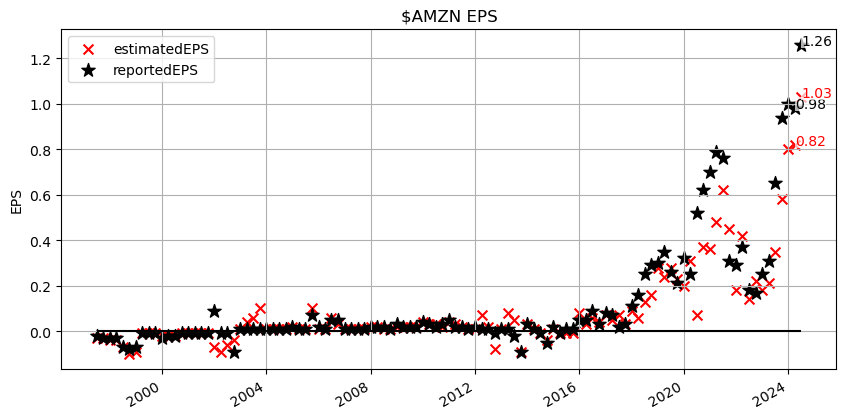

In [23]:
stock = 'amzn'
d['actual'] = d['reportedEPS'].index.strftime('%-m/%d/%y')
d['estimatedEPS'] = d['estimatedEPS'].astype(float) 
d['reportedEPS'] = d['reportedEPS'].astype(float)

fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(d.index, d['estimatedEPS'], label='estimatedEPS', color = 'red', marker='x', s = 50)
ax.scatter(d.index, d['reportedEPS'], label='reportedEPS', color = 'black', marker='*', s = 100)
# Annotate the date of the earnings report.
for dte, reported, est in zip(d.index, d['reportedEPS'], d['estimatedEPS']):
    if dte > dt.datetime(2024, 1, 1):
        ax.annotate(f'{est:.2f}', (dte, est), color='red',bbox=dict(boxstyle='square', pad=0, lw=0, fc=(1, 1, 1, 0.7)))
        ax.annotate(f'{reported:.2f}', (dte, reported),bbox=dict(boxstyle='square', pad=0, lw=0, fc=(1, 1, 1, 0.7)))

# Only Label the x-axis with the actual dates of the earnings reports.
# set ticks 
# ax.set_xticks(d.index)
# Format dates in the x-axis (labels)
# ax.set_xticklabels(d['actual'], rotation=45)
ax.hlines(0, d.index[0], d.index[-1], color='black', linestyle='-', linewidth=1.5)
ax.grid()
ax.legend()
fig.autofmt_xdate()
ax.set_title(f'${stock.upper()} EPS')
ax.set_ylabel('EPS')
plt.show()

In [24]:
d.tail()

,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,actual
fiscalDateEnding,,,,,,,
2023-06-30,2023-08-03,0.65,0.35,0.3,85.7143,post-market,6/30/23
2023-09-30,2023-10-26,0.94,0.58,0.36,62.069,post-market,9/30/23
2023-12-31,2024-02-01,1.00,0.80,0.2,25,post-market,12/31/23
2024-03-31,2024-04-30,0.98,0.82,0.16,19.5122,post-market,3/31/24
2024-06-30,2024-08-01,1.26,1.03,0.23,22.3301,post-market,6/30/24


PearsonRResult(statistic=0.9491295185748033, pvalue=1.6250651121770049e-55)


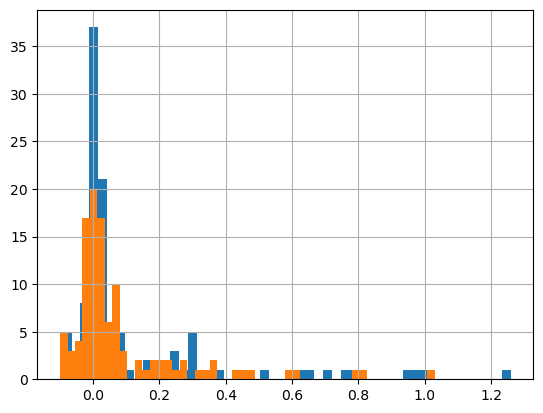

In [35]:
d.reportedEPS.hist(bins = 50) ## Distribution of Reported EPS 
d.estimatedEPS.hist(bins = 50) ## Distribution of Estimated EPS

import scipy.stats as stats

print(stats.pearsonr(d.reportedEPS, d.estimatedEPS)) ## Correlation between Reported and Estimated EPS